In [4]:
from pathlib import Path

In [5]:
from urllib.request import urlretrieve

In [6]:
urlretrieve?

Signature: urlretrieve(url, filename=None, reporthook=None, data=None)
Docstring:
Retrieve a URL into a temporary location on disk.

Requires a URL argument. If a filename is passed, it is used as
the temporary file location. The reporthook argument should be
a callable that accepts a block number, a read size, and the
total file size of the URL target. The data argument should be
valid URL encoded data.

If a filename is passed and the URL points to a local resource,
the result is a copy from local file to new file.

Returns a tuple containing the path to the newly created
data file as well as the resulting HTTPMessage object.
File:      /opt/anaconda3/lib/python3.9/urllib/request.py
Type:      function


In [7]:
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

In [8]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'

In [9]:
path_data = Path('data')
print(path_data)
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

data


In [10]:
from urllib.request import urlretrieve
if not path_gz.exists():
    urlretrieve(MNIST_URL, path_gz)

In [11]:
!ls -l data

total 33312
-rw-r--r--  1 htkumar  staff  17051982 Oct 12 00:34 mnist.pkl.gz


In [12]:
with gzip.open(path_gz, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [13]:
type(x_train), x_train.shape

(numpy.ndarray, (50000, 784))

In [14]:
lst1 = list(x_train[0])
vals = lst1[200: 210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [15]:
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [16]:
def chunks(x, sz):
    for i in range(0, len(x), sz):
        yield x[i:i+sz]

In [17]:
list(chunks(vals, 5))

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

In [18]:
len(lst1)

784

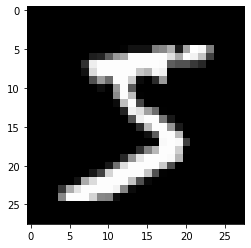

In [19]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1, 28)));

In [20]:
from itertools import islice

In [21]:
it = iter(vals)
islice(it, 5)

In [22]:
list(islice(it, 5))

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [23]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)), []))

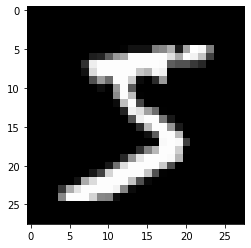

In [24]:
plt.imshow(img);

In [25]:
iter??

Docstring:
iter(iterable) -> iterator
iter(callable, sentinel) -> iterator

Get an iterator from an object.  In the first form, the argument must
supply its own iterator, or be a sequence.
In the second form, the callable is called until it returns the sentinel.
Type:      builtin_function_or_method


In [26]:
len(img[0]), len(img)

(28, 28)

In [27]:
img[20][15]

0.98828125

In [28]:
class Matrix:
    def __init__(self, xs):
        self.xs = xs
    def __getitem__(self, i):
        return self.xs[i[0]][i[1]]

In [29]:
m = Matrix(img)
m[20, 15]

0.98828125

In [ ]:
import torch

: 

In [30]:
import torch
from torch import tensor

In [31]:
tensor(vals)

tensor([0.0000, 0.0000, 0.0000, 0.1914, 0.9297, 0.9883, 0.9883, 0.9883, 0.9883,
        0.9883])

In [32]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))
x_train.shape

torch.Size([50000, 784])

In [33]:
x_train.type()

'torch.FloatTensor'

In [34]:
imgs = x_train.reshape((-1, 28, 28))
imgs.shape

torch.Size([50000, 28, 28])

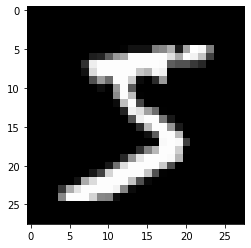

In [35]:
plt.imshow(imgs[0]);

In [36]:
imgs[0,20,15]

tensor(0.9883)

In [37]:
n,c = x_train.shape
n, c

(50000, 784)

In [38]:
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

In [39]:
min(y_train), max(y_train)

(tensor(0), tensor(9))

In [40]:
y_train.min(), y_train.max()

(tensor(0), tensor(9))

In [41]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [42]:
seed(457428938475)
rnd_state

(4976, 20238, 499)

In [43]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x,y,z
    return (x/30269 + y/30307 + z/30323) % 1.0

In [44]:
rand(), rand(), rand()

(0.7645251082582081, 0.7920889799553945, 0.06912886811267205)

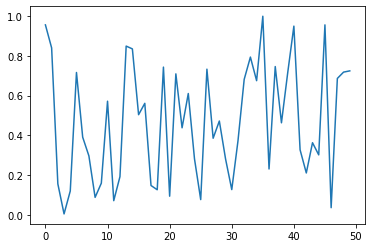

In [45]:
plt.plot([rand() for _ in range(50)]);

In [46]:
plt.plot??

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

(array([ 959.,  972., 1036., 1019., 1037.,  971.,  997., 1000., 1036.,
         973.]),
 array([6.60514437e-06, 1.00005135e-01, 2.00003666e-01, 3.00002196e-01,
        4.00000726e-01, 4.99999256e-01, 5.99997787e-01, 6.99996317e-01,
        7.99994847e-01, 8.99993378e-01, 9.99991908e-01]),
 <BarContainer object of 10 artists>)

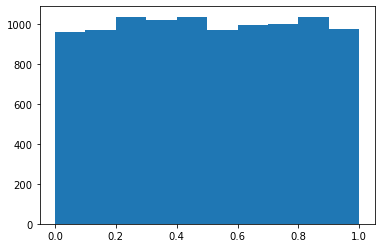

In [47]:
plt.hist([rand() for _ in range(10_000)])

In [48]:
%timeit -n 10 torch.randn(784, 10)

The slowest run took 4.24 times longer than the fastest. This could mean that an intermediate result is being cached.
127 µs ± 95.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Matrix Multiplication

In [49]:
torch.manual_seed(1)
weights = torch.randn(784, 10)
bias = torch.zeros(10)

In [50]:
m1 = x_valid[:5]
m2 = weights

In [51]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [52]:
ar,ac = m1.shape
br,bc = m2.shape
(ar,ac), (br, bc)

((5, 784), (784, 10))

In [53]:
t1 = torch.zeros(ar, bc)
t1.shape

torch.Size([5, 10])

In [54]:
for i in range(ar):
    for j in range(bc):
        for k in range(ac):
            t1[i,j] += m1[i,k] * m2[k,j]

In [55]:
t1

tensor([[-10.9417,  -0.6844,  -7.0038,  -4.0066,  -2.0857,  -3.3588,   3.9127,
          -3.4375, -11.4696,  -2.1153],
        [ 14.5430,   5.9977,   2.8914,  -4.0777,   6.5914, -14.7383,  -9.2787,
           2.1577, -15.2772,  -2.6758],
        [  2.2204,  -3.2171,  -4.7988,  -6.0453,  14.1661,  -8.9824,  -4.7922,
          -5.4446, -20.6758,  13.5657],
        [ -6.7097,   8.8998,  -7.4611,  -7.8966,   2.6994,  -4.7260, -11.0278,
         -12.9776,  -6.4443,   3.6376],
        [ -2.4444,  -6.4034,  -2.3984,  -9.0371,  11.1772,  -5.7724,  -8.9214,
          -3.7862,  -8.9827,   5.2797]])

In [56]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)

In [57]:
t1

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [58]:
def matmul(a, b):
    ar,ac = a.shape
    br,bc = b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i,j] += m1[i,k] * m2[k,j]
    return c

In [59]:
%time _=matmul(m1, m2)

CPU times: user 580 ms, sys: 4.72 ms, total: 585 ms
Wall time: 588 ms


### Numba

In [60]:
from numba import njit

In [61]:
@njit
def dot(a, b):
    res = 0.
    for i in range(len(a)): res += a[i]*b[i]
    return res

In [62]:
from numpy import array

In [63]:
%time dot(array([1., 2, 3]), array([2., 3, 4]))

CPU times: user 215 ms, sys: 34.2 ms, total: 250 ms
Wall time: 338 ms


20.0

In [64]:
%time dot(array([1., 2, 3]), array([2., 3, 4]))

CPU times: user 25 µs, sys: 0 ns, total: 25 µs
Wall time: 26.7 µs


20.0

In [65]:
def matmul(a, b):
    (ar,ac),(br,bc) = a.shape,b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = dot(a[i,:], b[:,j])
    return c

In [66]:
m1a,m2a = m1.numpy(),m2.numpy()

In [67]:
from fastcore.test import *

In [68]:
test_close(t1, matmul(m1a,m2a))

In [69]:
%timeit -n 50 matmul(m1a,m2a)

351 µs ± 22.2 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [70]:
%time _=matmul(m1a, m2a)

CPU times: user 1.55 ms, sys: 1.12 ms, total: 2.67 ms
Wall time: 2.01 ms


### Elementwise ops

In [71]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [72]:
a+b

tensor([12., 14.,  3.])

In [73]:
(a<b).float().mean()

tensor(0.67)

In [74]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [75]:
sf = (m*m).sum()
sf

tensor(285.)

In [76]:
sf.sqrt()

tensor(16.88)

In [77]:
m[2,:], m[:,2]

(tensor([7., 8., 9.]), tensor([3., 6., 9.]))

In [78]:
def matmul(a, b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = (a[i] * b[:,j]).sum()
    return c

In [79]:
test_close(t1, matmul(m1, m2))

In [80]:
test_close??

Signature: test_close(a, b, eps=1e-05)
Source:   
def test_close(a,b,eps=1e-5):
    "`test` that `a` is within `eps` of `b`"
    test(a,b,partial(is_close,eps=eps),'close')
File:      /opt/anaconda3/lib/python3.9/site-packages/fastcore/test.py
Type:      function


In [81]:
%timeit -n 50 _=matmul(m1, m2)

747 µs ± 58.1 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [82]:
def matmul(a, b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = torch.dot(a[i], b[:,j])
    return c

In [83]:
test_close(t1, matmul(m1, m2))

In [84]:
%timeit -n 50 _=matmul(m1, m2)

590 µs ± 12 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [85]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [86]:
m.shape

torch.Size([3, 3])

In [87]:
c = tensor([10, 20, 30]);

In [88]:
c.shape

torch.Size([3])

In [89]:
t = c.expand_as(m)

In [90]:
t.storage()

 10
 20
 30
[torch.storage._TypedStorage(dtype=torch.int64, device=cpu) of size 3]

In [91]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

In [92]:
c.unsqueeze(0).shape

torch.Size([1, 3])

In [93]:
c.unsqueeze(1).shape

torch.Size([3, 1])

In [94]:
c[None, :].shape

torch.Size([1, 3])

In [95]:
c[None].shape

torch.Size([1, 3])

In [96]:
c[:,None].shape

torch.Size([3, 1])

In [97]:
c[...,None].shape

torch.Size([3, 1])

In [98]:
t

tensor([[10, 20, 30],
        [10, 20, 30],
        [10, 20, 30]])

In [99]:
c

tensor([10, 20, 30])

In [100]:
c[None,:] * c[:,None]

tensor([[100, 200, 300],
        [200, 400, 600],
        [300, 600, 900]])

In [101]:
digit = m1[0]
digit.shape, m2.shape

(torch.Size([784]), torch.Size([784, 10]))

In [102]:
m1.shape

torch.Size([5, 784])

In [103]:
digit[:,None].shape

torch.Size([784, 1])

In [104]:
m2.shape

torch.Size([784, 10])

In [105]:
digit.unsqueeze(1).shape

torch.Size([784, 1])

In [106]:
def matmul(a, b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        c[i] = (a[i,:,None] * b).sum(dim=0)  # (ac, 1) * (br, bc)
    return c

In [107]:
m1[0, :].unsqueeze(-1).shape

torch.Size([784, 1])

In [108]:
test_close(t1, matmul(m1, m2))

In [109]:
%timeit -n 50 _=matmul(m1, m2)

132 µs ± 7.76 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [110]:
tr = matmul(x_train, weights)
tr.shape

torch.Size([50000, 10])

In [111]:
%time _=matmul(x_train, weights)

CPU times: user 2.04 s, sys: 330 ms, total: 2.37 s
Wall time: 1.2 s


In [112]:
%timeit -n 10 _=matmul(x_train, weights)

1.2 s ± 7.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [113]:
%timeit -n 5 _=torch.matmul(x_train, weights)

11.8 ms ± 1.69 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


### CUDA

In [114]:
from numba import cuda

In [115]:
# x_train.cuda()

In [116]:
m1

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [117]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [118]:
mr = torch.einsum('ik,kj->ikj', m1, m2)
mr.shape

torch.Size([5, 784, 10])

In [119]:
mr.sum(1)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [121]:
torch.einsum('ik,kj->ij', m1, m2)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [122]:
test_close(mr.sum(1), torch.einsum('ik,kj->ij', m1, m2))